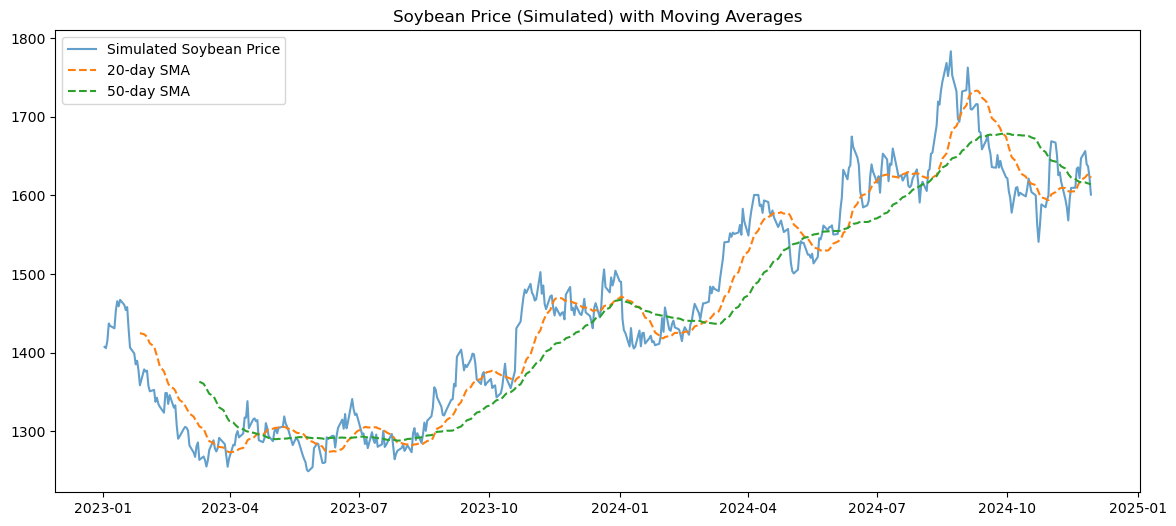

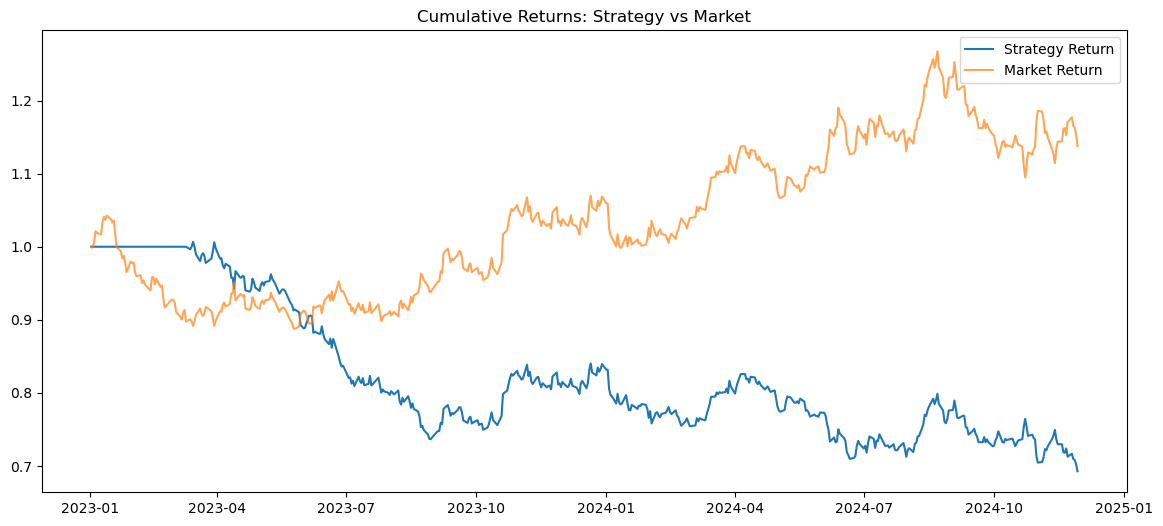

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Strategy: Moving Average Crossover
# ----------------------------------

# 1. We simulate fake soybean prices using random daily changes (like a real market).
# 2. We calculate two moving averages:
#    - SMA20: average price over the last 20 days (short-term trend)
#    - SMA50: average price over the last 50 days (long-term trend)
# 3. We generate trading signals:
#    - Buy signal (1): when SMA20 crosses above SMA50 (price is starting to go up)
#    - Sell signal (-1): when SMA20 crosses below SMA50 (price is starting to fall)
# 4. We compare:
#    - Market return: if we just held soybean every day
#    - Strategy return: if we followed the buy/sell signals
# 5. The goal is to make better returns by entering and exiting at the right time

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 500 trading days of soybean prices using geometric Brownian motion
n_days = 500
mu = 0.0002        # daily expected return
sigma = 0.01       # daily volatility
start_price = 1400  # starting price in cents per bushel

# Generate log returns
log_returns = np.random.normal(loc=mu, scale=sigma, size=n_days)

# Convert to price series
price_series = start_price * np.exp(np.cumsum(log_returns))

# Create DataFrame
dates = pd.date_range(start='2023-01-01', periods=n_days, freq='B')  # business days
data = pd.DataFrame({'Date': dates, 'Close': price_series})
data.set_index('Date', inplace=True)

# Compute moving averages
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

# Generate signals
data['Signal'] = 0
data.loc[data['SMA20'] > data['SMA50'], 'Signal'] = 1
data.loc[data['SMA20'] < data['SMA50'], 'Signal'] = -1
data['Position'] = data['Signal'].shift(1)

# Calculate returns
data['Market Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Position'] * data['Market Return']

# Plot price and MAs
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Simulated Soybean Price', alpha=0.7)
plt.plot(data['SMA20'], label='20-day SMA', linestyle='--')
plt.plot(data['SMA50'], label='50-day SMA', linestyle='--')
plt.title('Soybean Price (Simulated) with Moving Averages')
plt.legend()
plt.show()

# Plot cumulative returns
cumulative_strategy = (1 + data['Strategy Return'].fillna(0)).cumprod()
cumulative_market = (1 + data['Market Return'].fillna(0)).cumprod()

plt.figure(figsize=(14, 6))
plt.plot(cumulative_strategy, label='Strategy Return')
plt.plot(cumulative_market, label='Market Return', alpha=0.7)
plt.title("Cumulative Returns: Strategy vs Market")
plt.legend()
plt.show()